In [1]:
import pandas as pd
import pymc as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

In [2]:
df=pd.read_csv('/content/Dataset.csv')

In [4]:
print("Dataset head:")
df.head()

Dataset head:


,time,input_voltage,el_power
0,810.07028,10.0,1228.791720
1,811.06938,10.0,1223.041745
2,812.06848,10.0,1244.960866
3,813.06758,10.0,1229.259058
4,814.06668,10.0,1248.117024


In [5]:
print("\nDataset summary:")
df.describe()


Dataset summary:


,time,input_voltage,el_power
count,52940.000000,52940.000000,52940.000000
mean,5606.444209,5.505534,1843.315949
std,2960.330233,2.549721,723.126377
min,810.000000,3.000000,932.837260
25%,3086.930000,3.000000,1205.743900
50%,5431.033890,4.842105,1605.753998
75%,7782.301370,7.421053,2399.419112
max,12636.840000,10.000000,3249.891217


#Not Standardizing X: Normal Distribution

In [8]:
X = df[['input_voltage']]  # Feature must be 2D
Y = df['el_power']  # Target variable

with pm.Model() as model_1:

    α = pm.Normal('α', mu=0, sigma=1000)  # Intercept
    β = pm.Normal('β', mu=0, sigma=1000)  # Slope
    ϵ = pm.HalfNormal('ϵ', sigma=1000)    # Error term (standard deviation)

    # linear model
    μ = pm.Deterministic('μ', α + β * X['input_voltage'])

    # likelihood using Normal distribution
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=Y)

    # Sample
    idata_model_1 = pm.sample(1000)

Output()

#Not Standardizing  X: Gamma Distribution

In [9]:
with pm.Model() as model_2:
    # priors for the parameters
    α = pm.Normal('α', mu=0, sigma=1000)  # Intercept
    β = pm.Normal('β', mu=0, sigma=1000)  # Slope
    ϵ = pm.HalfNormal('ϵ', sigma=1000)    # Error term (scale)

    # linear model - positive for Gamma distribution
    μ = pm.Deterministic('μ', α + β * X['input_voltage'])


    # likelihood using Gamma distribution
    y_pred = pm.Gamma('y_pred', mu=μ, sigma=ϵ, observed=Y)

    #
    idata_model_2 = pm.sample(1000)

Output()

In [10]:
pm.summary(idata_model_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,465.934,3.658,459.414,472.918,0.128,0.105,816.0,872.0,1.0
β,250.177,0.602,248.969,251.239,0.021,0.017,799.0,805.0,1.0
μ[0],2967.707,3.101,2961.535,2973.216,0.096,0.063,1036.0,1283.0,1.0
μ[1],2967.707,3.101,2961.535,2973.216,0.096,0.063,1036.0,1283.0,1.0
μ[2],2967.707,3.101,2961.535,2973.216,0.096,0.063,1036.0,1283.0,1.0
...,...,...,...,...,...,...,...,...,...
μ[52936],2277.218,1.849,2273.496,2280.375,0.046,0.038,1583.0,1385.0,1.0
μ[52937],2277.218,1.849,2273.496,2280.375,0.046,0.038,1583.0,1385.0,1.0
μ[52938],2277.218,1.849,2273.496,2280.375,0.046,0.038,1583.0,1385.0,1.0
μ[52939],2277.218,1.849,2273.496,2280.375,0.046,0.038,1583.0,1385.0,1.0


In [12]:
pm.summary(idata_model_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,511.369,3.360,505.148,517.802,0.111,0.097,924.0,794.0,1.0
β,243.040,0.549,242.009,244.049,0.018,0.016,892.0,857.0,1.0
μ[0],2941.772,2.840,2936.581,2947.061,0.082,0.060,1206.0,1255.0,1.0
μ[1],2941.772,2.840,2936.581,2947.061,0.082,0.060,1206.0,1255.0,1.0
μ[2],2941.772,2.840,2936.581,2947.061,0.082,0.060,1206.0,1255.0,1.0
...,...,...,...,...,...,...,...,...,...
μ[52936],2270.981,1.714,2267.749,2274.242,0.037,0.036,2174.0,1436.0,1.0
μ[52937],2270.981,1.714,2267.749,2274.242,0.037,0.036,2174.0,1436.0,1.0
μ[52938],2270.981,1.714,2267.749,2274.242,0.037,0.036,2174.0,1436.0,1.0
μ[52939],2270.981,1.714,2267.749,2274.242,0.037,0.036,2174.0,1436.0,1.0


In [13]:
# Function to create all plots for a model
def plot_model_analysis(idata, X, Y, model_name):
    # 1. Parameter correlation plot
    plt.figure(figsize=(8, 6))
    α_samples = idata.posterior['α'].values.flatten()
    β_samples = idata.posterior['β'].values.flatten()
    plt.scatter(α_samples, β_samples, alpha=0.5, s=10)
    plt.xlabel('α')
    plt.ylabel('β')
    plt.title(f'Parameter Correlation - {model_name}')
    plt.tight_layout()
    plt.show()

    # 2. Regression line with data
    plt.figure(figsize=(8, 6))
    plt.scatter(X['input_voltage'], Y, alpha=0.6)

    # Get the posterior means
    α_mean = float(idata.posterior['α'].mean())
    β_mean = float(idata.posterior['β'].mean())

    # Plot regression line
    x_range = np.linspace(X['input_voltage'].min(), X['input_voltage'].max(), 100)
    plt.plot(x_range, α_mean + β_mean * x_range, 'k-')

    # Add equation
    plt.text(0.5, 0.1, f'y = {α_mean:.2f} + {β_mean:.2f} * x',
             horizontalalignment='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regression Line - {model_name}')
    plt.show()

    # 3. Regression with uncertainty
    plt.figure(figsize=(8, 6))

    # Generate predictions for a range of x values
    x_range = np.linspace(X['input_voltage'].min(), X['input_voltage'].max(), 100)

    # Generate predictions with uncertainty
    predictions = np.zeros((len(idata.posterior.chain) *
                           len(idata.posterior.draw), len(x_range)))

    index = 0
    for c in range(len(idata.posterior.chain)):
        for d in range(len(idata.posterior.draw)):
            α = idata.posterior['α'].values[c, d]
            β = idata.posterior['β'].values[c, d]
            predictions[index] = α + β * x_range
            index += 1

    # Calculate statistics
    mean_pred = np.mean(predictions, axis=0)
    lower_ci = np.percentile(predictions, 2.5, axis=0)
    upper_ci = np.percentile(predictions, 97.5, axis=0)

    # Plot the uncertainty band first (with higher opacity)
    plt.fill_between(x_range, lower_ci, upper_ci, color='gray', alpha=0.5)

    # Plot the data points
    plt.scatter(X['input_voltage'], Y, alpha=0.6, color='blue')

    # Plot the mean prediction line on top
    plt.plot(x_range, mean_pred, 'k-', linewidth=2)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regression with 95% Credible Interval - {model_name}')
    plt.show()



# Graphs for Normal Distribution Graph

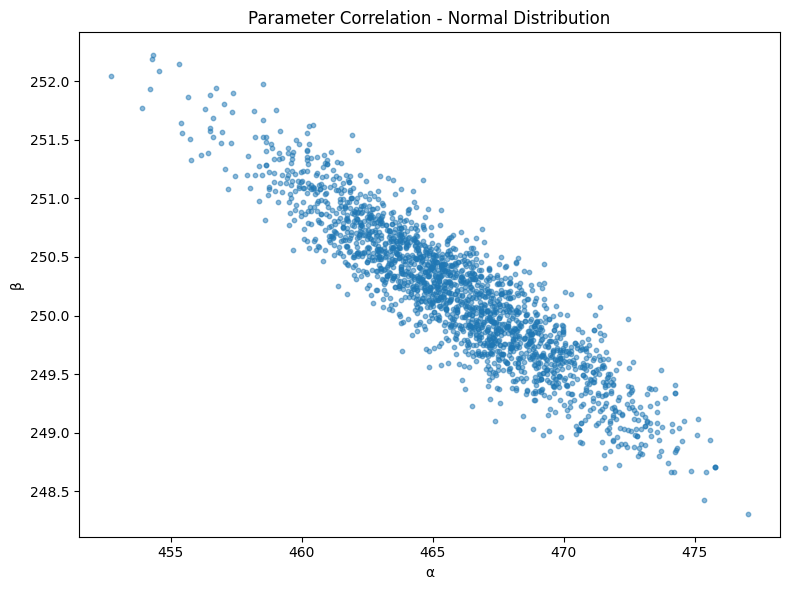

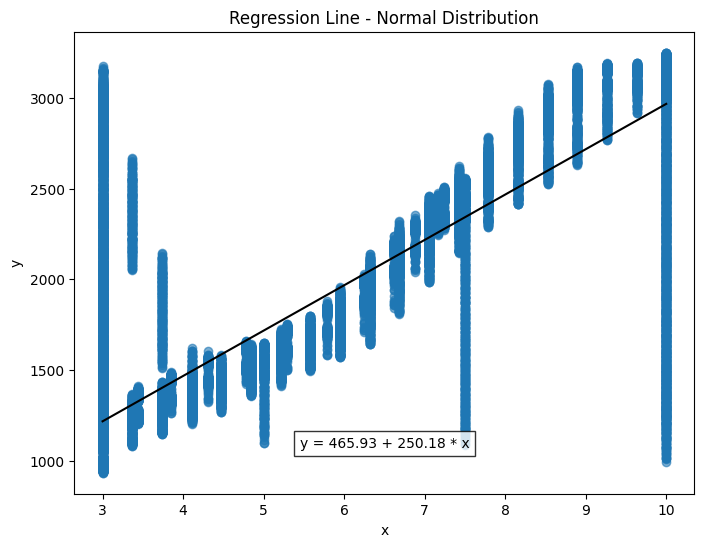

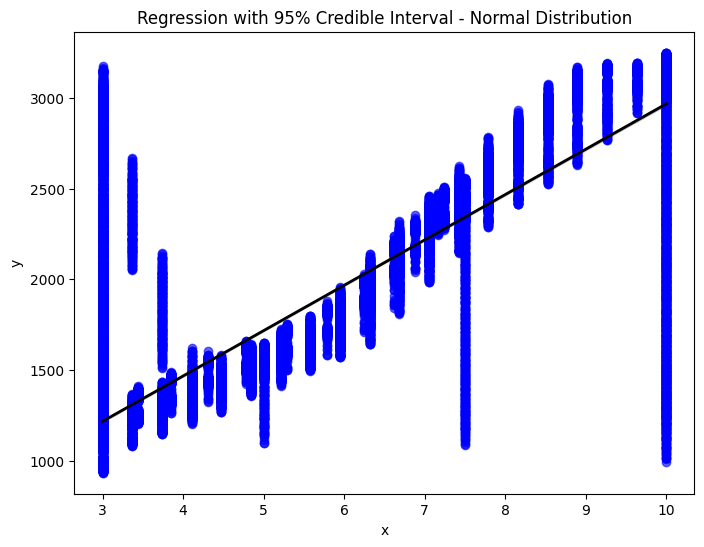

In [14]:
# Create plots for both models
plot_model_analysis(idata_model_1, X, Y, "Normal Distribution")

# Graphs for Gamma Distribution Graph

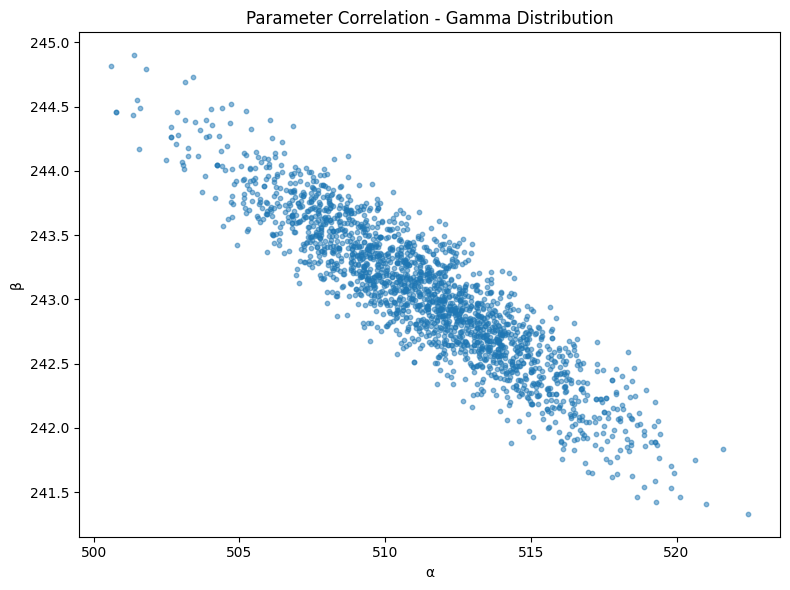

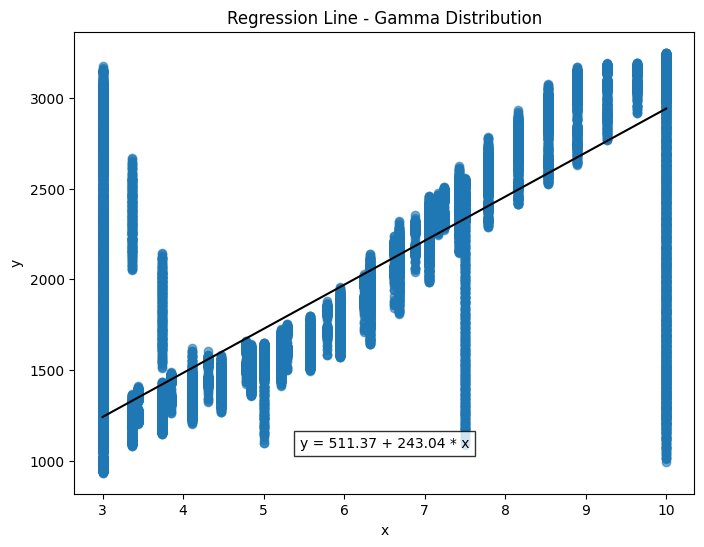

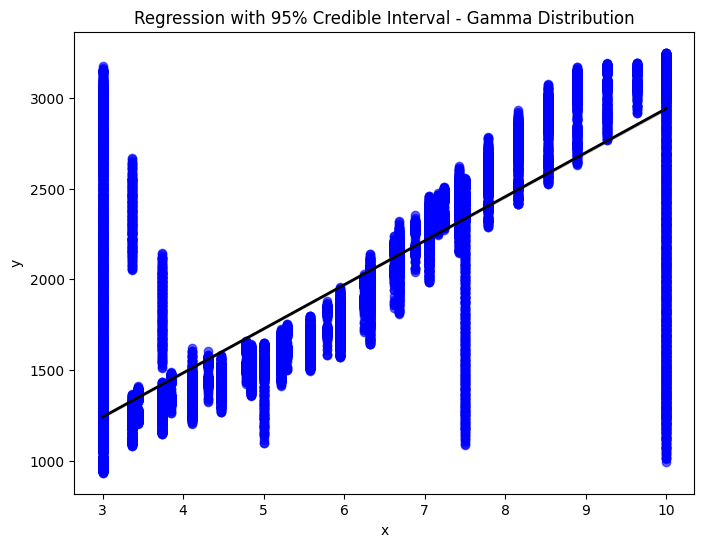

In [15]:
plot_model_analysis(idata_model_2, X, Y, "Gamma Distribution")

In [16]:
# Calculate R-squared for model_1
with model_1:
    # Get posterior mean for mu (predicted values)
    posterior_mu = idata_model_1.posterior['μ'].mean(dim=["chain", "draw"]).values

    # Calculate R-squared
    ss_total = np.sum((Y - np.mean(Y))**2)
    ss_residual = np.sum((Y - posterior_mu)**2)
    r2_model_1 = 1 - (ss_residual / ss_total)

    print(f"Model 1 (Normal likelihood) R-squared: {r2_model_1:.4f}")

# Calculate R-squared for model_2
with model_2:
    # Get posterior mean for mu (predicted values)
    posterior_mu = idata_model_2.posterior['μ'].mean(dim=["chain", "draw"]).values

    # Calculate R-squared
    ss_total = np.sum((Y - np.mean(Y))**2)
    ss_residual = np.sum((Y - posterior_mu)**2)
    r2_model_2 = 1 - (ss_residual / ss_total)

    print(f"Model 2 (Gamma likelihood) R-squared: {r2_model_2:.4f}")

# Calculate and display the standard deviation of R-squared
r2_samples_1 = []
r2_samples_2 = []

for c in range(len(idata_model_1.posterior.chain)):
    for d in range(len(idata_model_1.posterior.draw)):
        mu_1 = idata_model_1.posterior['μ'][c, d].values
        ss_resid_1 = np.sum((Y - mu_1)**2)
        r2_1 = 1 - (ss_resid_1 / ss_total)
        r2_samples_1.append(r2_1)

        mu_2 = idata_model_2.posterior['μ'][c, d].values
        ss_resid_2 = np.sum((Y - mu_2)**2)
        r2_2 = 1 - (ss_resid_2 / ss_total)
        r2_samples_2.append(r2_2)

r2_std_1 = np.std(r2_samples_1)
r2_std_2 = np.std(r2_samples_2)

print(f"Model 1 R-squared std dev: {r2_std_1:.4f}")
print(f"Model 2 R-squared std dev: {r2_std_2:.4f}")

# Display results in a summary format
results = pd.DataFrame({
    'Model': ['Normal', 'Gamma'],
    'R-squared': [r2_model_1, r2_model_2],
    'R-squared std': [r2_std_1, r2_std_2]
})
print("\nModel Comparison:")
print(results)

Model 1 (Normal likelihood) R-squared: 0.7782
Model 2 (Gamma likelihood) R-squared: 0.7775
Model 1 R-squared std dev: 0.0000
Model 2 R-squared std dev: 0.0001

Model Comparison:
    Model  R-squared  R-squared std
0  Normal   0.778175       0.000009
1   Gamma   0.777469       0.000104


Comparing Normal and Gamma distributions as likelihood functions for predicting electrical energy in a micro gas turbine dataset, we find both models yield similar performance. The Normal model achieves an R-squared of 0.7782, slightly outperforming the Gamma model (0.7775). The minimal difference (0.0007) suggests both models explain approximately 78% of the variance.

The Normal distribution provides a marginally better fit due to its higher R-squared and assumption of symmetric residuals. However, the Gamma distribution ensures non-negative predictions, which is advantageous for datasets with right-skewed errors or values near zero.

While the Normal model is preferable for this dataset due to its better fit, the choice depends on whether statistical accuracy or theoretical constraints are prioritized in future applications.

# Standardizing  X

In [ ]:
# Define X (independent variable) and Y (dependent variable)
X = df[['input_voltage']].values
Y = df['el_power'].values

# Standardizing X
X_mean = X.mean()
X_std = X.std()
X_std_arr = (X - X_mean) / X_std
X_orig = X.copy()

# Standardizing X: normal Distibution

In [ ]:
# Model 1: Normal likelihood
with pm.Model() as model_1:
    # Priors
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    ϵ = pm.HalfCauchy('ϵ', beta=1)

    # Linear model
    μ = pm.Deterministic('μ', α + β * X_std_arr.flatten())

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=μ, sigma=ϵ, observed=Y)

    log_likelihood = pm.Deterministic("log_likelihood", pm.logp(y_obs, Y))

    # Sample from the posterior
    idata_model_1 = pm.sample(1000, tune=1000, return_inferencedata=True)

    pm.sample_posterior_predictive(idata_model_1, extend_inferencedata=True)

Output()

Output()

# Standardizing X: Gamma Distribution

In [ ]:
# Model 2: Gamma likelihood
with pm.Model() as model_2:
    # Priors
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    ϵ = pm.HalfCauchy('ϵ', beta=1)

    μ = pm.Deterministic('μ', α + β * X_std_arr.flatten())

    # Likelihood (using log link for Gamma)
    y_obs = pm.Gamma('y_obs', mu=pm.math.exp(μ), sigma=ϵ, observed=Y)

    log_likelihood = pm.Deterministic("log_likelihood", pm.logp(y_obs, Y))

    # Sample from the posterior
    idata_model_2 = pm.sample(1000, tune=1000, return_inferencedata=True)

    pm.sample_posterior_predictive(idata_model_2, extend_inferencedata=True)

Output()

Output()

In [ ]:
# Show the learned parameters
print("\nModel 1 (Normal) Summary:")
print(pm.summary(idata_model_1, var_names=['α', 'β', 'ϵ']))
print("\nModel 2 (Gamma) Summary:")
print(pm.summary(idata_model_2, var_names=['α', 'β', 'ϵ']))


Model 1 (Normal) Summary:
       mean     sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α  1803.165  1.533  1800.486  1806.151      0.028    0.032    2923.0   
β   624.061  1.485   621.141   626.727      0.028    0.033    2795.0   
ϵ   343.207  1.048   341.313   345.271      0.021    0.025    2486.0   

   ess_tail  r_hat  
α    1564.0    1.0  
β    1551.0    1.0  
ϵ    1445.0    1.0  

Model 2 (Gamma) Summary:
      mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
α    7.477  0.001    7.475    7.478      0.000    0.000    1203.0    1259.0   
β    0.304  0.001    0.302    0.305      0.000    0.000    1229.0    1436.0   
ϵ  342.998  1.097  340.944  344.978      0.026    0.022    1716.0    1600.0   

   r_hat  
α    1.0  
β    1.0  
ϵ    1.0  


In [ ]:
# posterior samples for both models
α_samples_1 = idata_model_1.posterior['α'].values.flatten()
β_samples_1 = idata_model_1.posterior['β'].values.flatten()
ϵ_samples_1 = idata_model_1.posterior['ϵ'].values.flatten()
α_samples_2 = idata_model_2.posterior['α'].values.flatten()
β_samples_2 = idata_model_2.posterior['β'].values.flatten()
ϵ_samples_2 = idata_model_2.posterior['ϵ'].values.flatten()

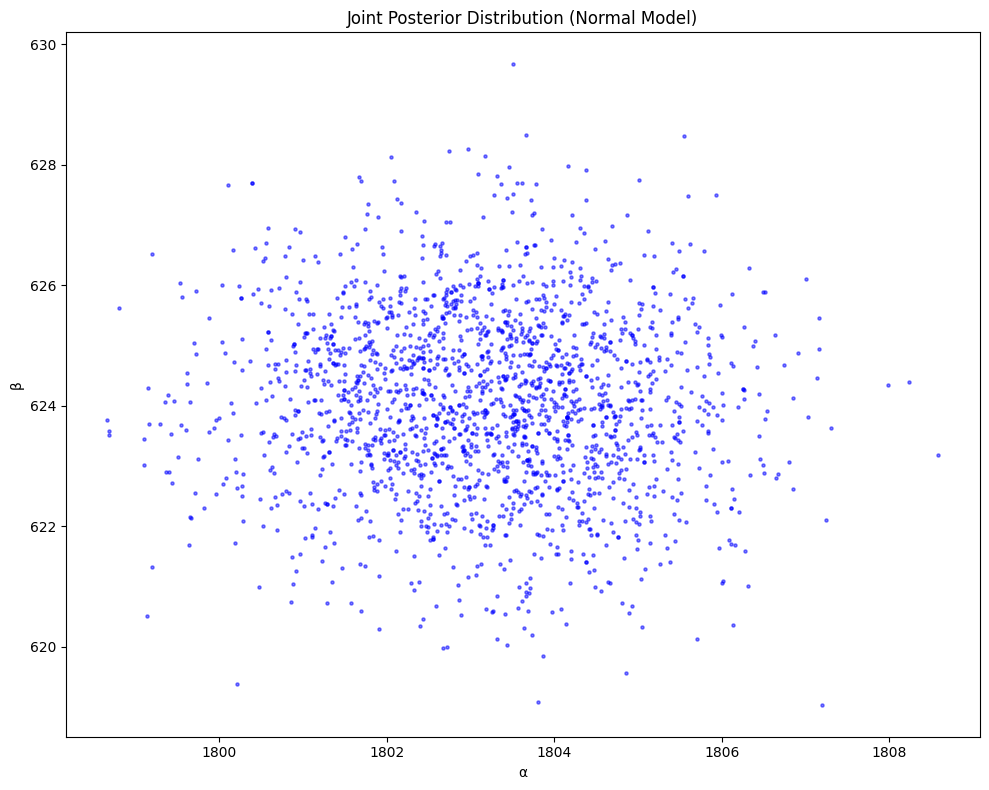

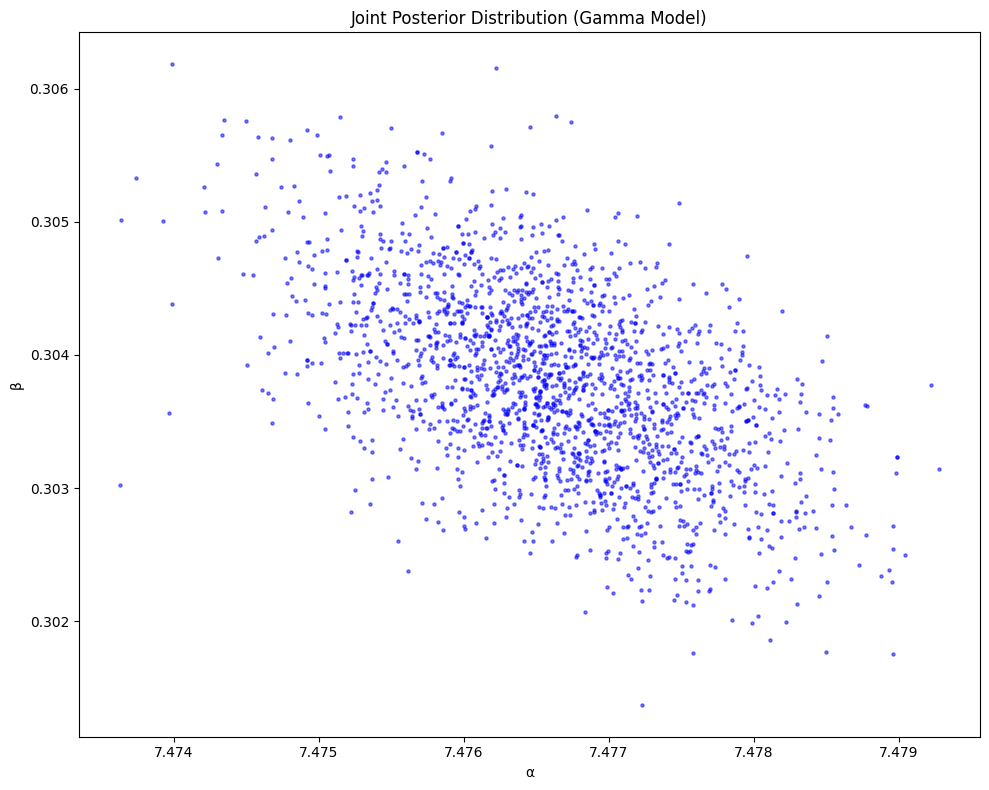

In [ ]:
# Plot the joint posterior distribution to check parameter correlation
plt.figure(figsize=(10, 8))
plt.scatter(α_samples_1, β_samples_1, alpha=0.5, s=5, color='blue')
plt.xlabel('α')
plt.ylabel('β')
plt.title("Joint Posterior Distribution (Normal Model)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(α_samples_2, β_samples_2, alpha=0.5, s=5, color='blue')
plt.xlabel('α')
plt.ylabel('β')
plt.title("Joint Posterior Distribution (Gamma Model)")
plt.tight_layout()
plt.show()

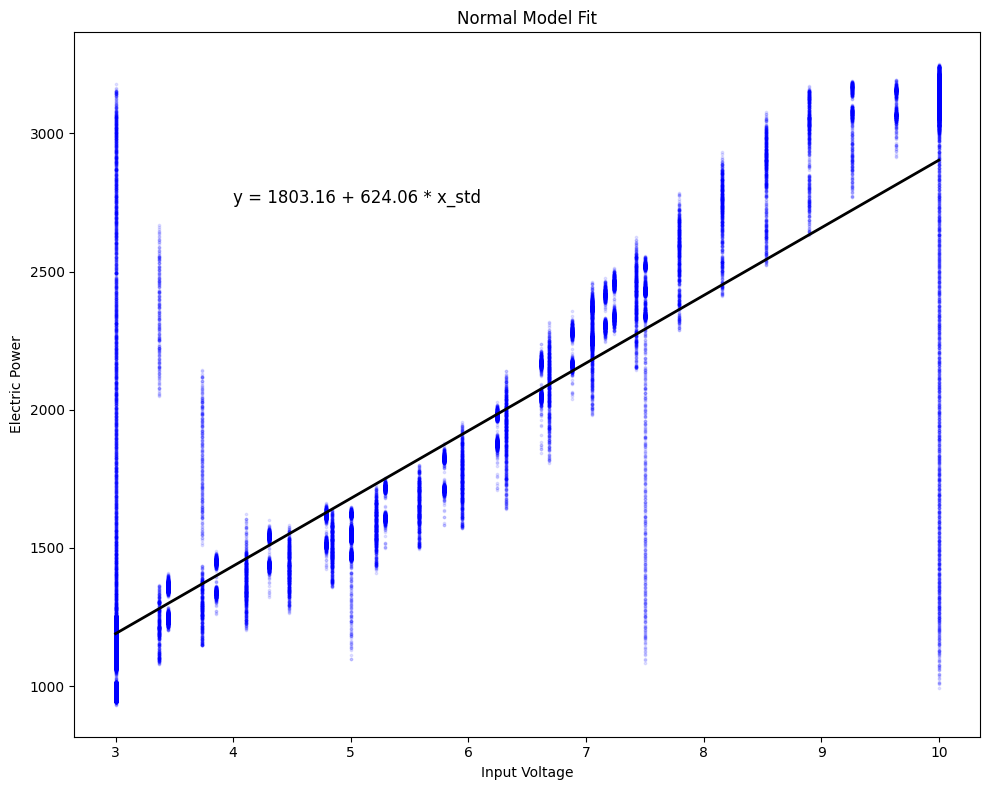

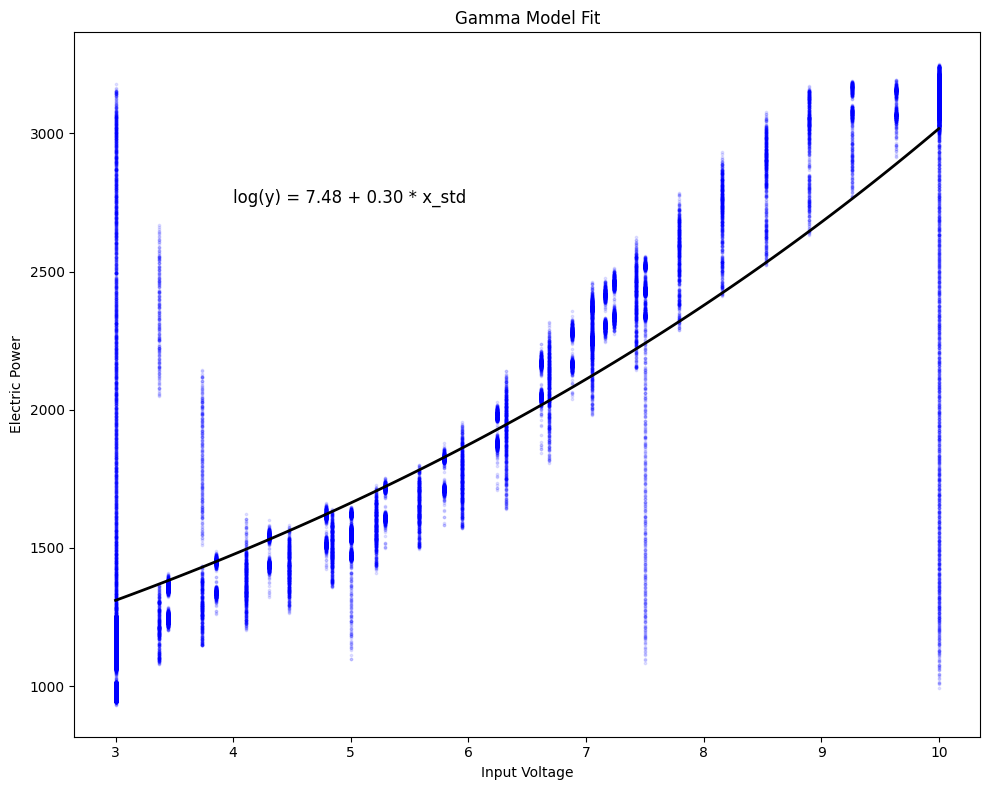

In [ ]:
# Model fit plot with regression line

# posterior means for parameters
α_mean_1 = α_samples_1.mean()
β_mean_1 = β_samples_1.mean()
α_mean_2 = α_samples_2.mean()
β_mean_2 = β_samples_2.mean()

# range of X values for the regression line
x_min = X_orig.min()
x_max = X_orig.max()
x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
x_range_std = (x_range - X_mean) / X_std
y_fit_1 = α_mean_1 + β_mean_1 * x_range_std.flatten()
y_fit_2 = np.exp(α_mean_2 + β_mean_2 * x_range_std.flatten())  # Using exp for Gamma

# Normal Model Fit Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_orig, Y, alpha=0.1, color='blue', s=3)

# Plot the regression line
plt.plot(x_range, y_fit_1, 'k-', linewidth=2)


# Add equation text
equation_text = f"y = {α_mean_1:.2f} + {β_mean_1:.2f} * x_std"
plt.text(x_min + 1, Y.max() - 500, equation_text, fontsize=12)

plt.xlabel('Input Voltage')
plt.ylabel('Electric Power')
plt.title("Normal Model Fit")
plt.tight_layout()
plt.show()

# Gamma Model Fit Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_orig, Y, alpha=0.1, color='blue', s=3)

# Plot the regression line
plt.plot(x_range, y_fit_2, 'k-', linewidth=2)

# Add equation text
equation_text = f"log(y) = {α_mean_2:.2f} + {β_mean_2:.2f} * x_std"
plt.text(x_min + 1, Y.max() - 500, equation_text, fontsize=12)

plt.xlabel('Input Voltage')
plt.ylabel('Electric Power')
plt.title("Gamma Model Fit")
plt.tight_layout()
plt.show()

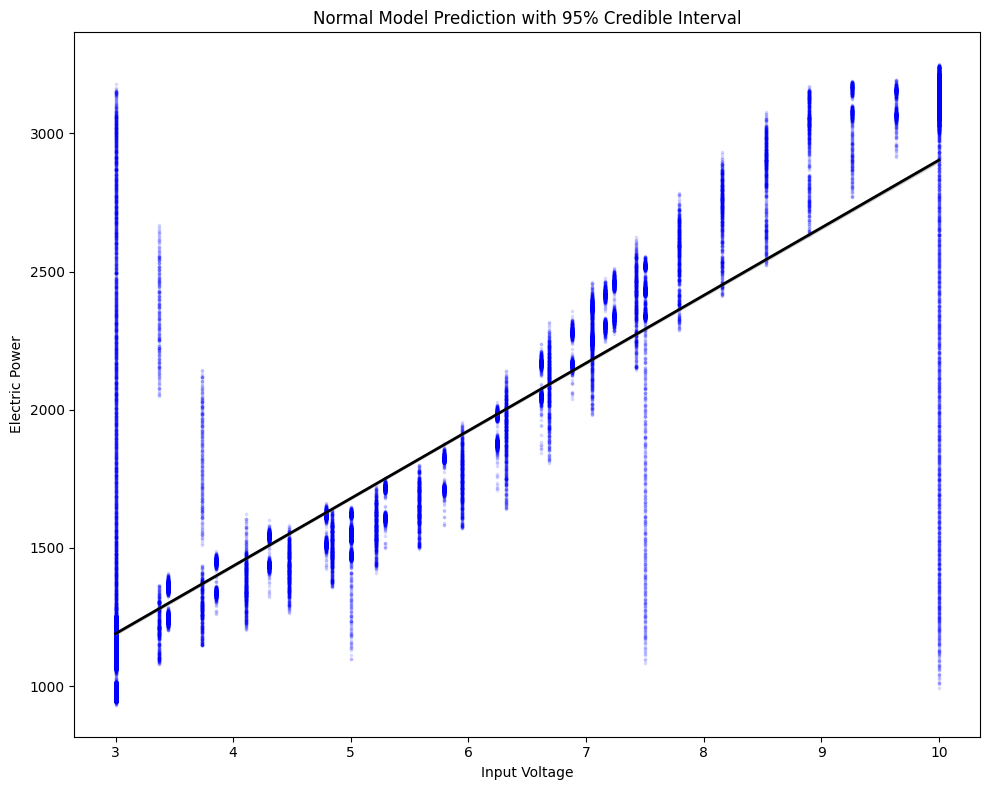

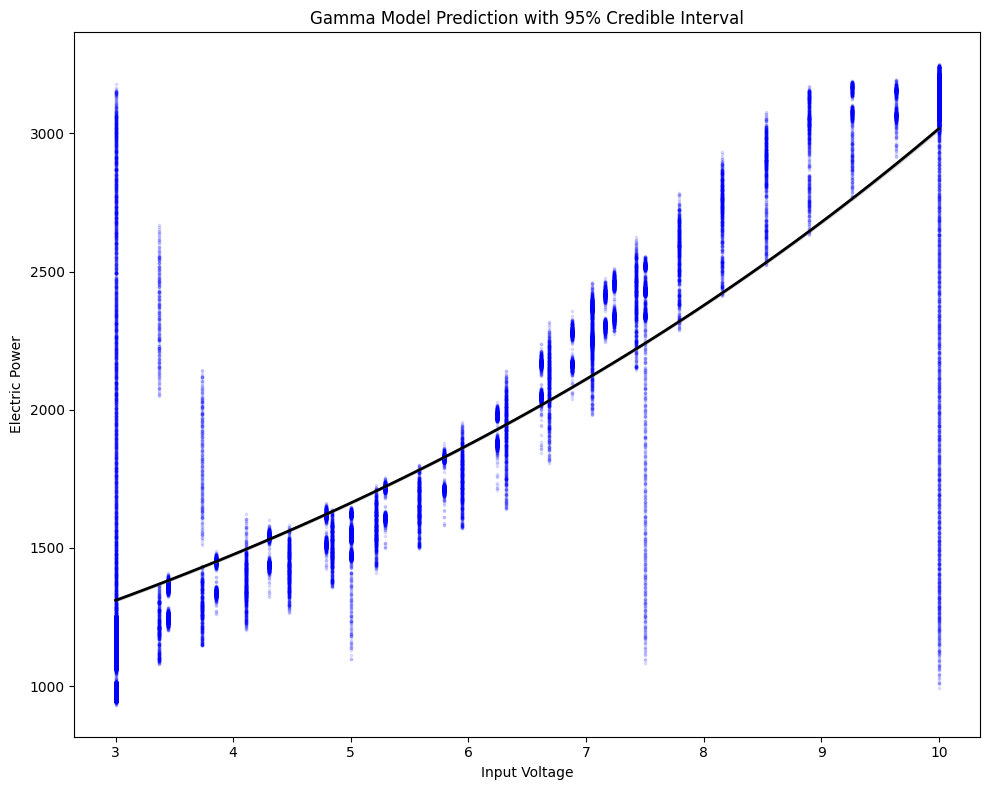

In [ ]:
# Prediction plot with confidence intervals

# predictions with uncertainty bands
x_pred = np.linspace(x_min, x_max, 100).reshape(-1, 1)
x_pred_std = (x_pred - X_mean) / X_std

# Normal Model Predictions
y_pred_samples_1 = np.zeros((len(α_samples_1), len(x_pred_std)))
for i in range(len(α_samples_1)):
    y_pred_samples_1[i] = α_samples_1[i] + β_samples_1[i] * x_pred_std.flatten()

y_pred_mean_1 = y_pred_samples_1.mean(axis=0)
y_pred_lower_1 = np.percentile(y_pred_samples_1, 2.5, axis=0)
y_pred_upper_1 = np.percentile(y_pred_samples_1, 97.5, axis=0)

# Plot Normal model predictions with uncertainty
plt.figure(figsize=(10, 8))
plt.scatter(X_orig, Y, alpha=0.1, color='blue', s=3)

# Plot mean prediction line
plt.plot(x_pred, y_pred_mean_1, 'k-', linewidth=2)

# Plot credible intervals
plt.fill_between(x_pred.flatten(), y_pred_lower_1, y_pred_upper_1, color='gray', alpha=0.3)

plt.xlabel('Input Voltage')
plt.ylabel('Electric Power')
plt.title("Normal Model Prediction with 95% Credible Interval")
plt.tight_layout()
plt.show()

# Gamma Model Predictions
y_pred_samples_2 = np.zeros((len(α_samples_2), len(x_pred_std)))
for i in range(len(α_samples_2)):
    y_pred_samples_2[i] = np.exp(α_samples_2[i] + β_samples_2[i] * x_pred_std.flatten())

y_pred_mean_2 = y_pred_samples_2.mean(axis=0)
y_pred_lower_2 = np.percentile(y_pred_samples_2, 2.5, axis=0)
y_pred_upper_2 = np.percentile(y_pred_samples_2, 97.5, axis=0)

# Plot Gamma model predictions with uncertainty
plt.figure(figsize=(10, 8))

plt.scatter(X_orig, Y, alpha=0.1, color='blue', s=3)

# Plot mean prediction line
plt.plot(x_pred, y_pred_mean_2, 'k-', linewidth=2)

# Plot credible intervals
plt.fill_between(x_pred.flatten(), y_pred_lower_2, y_pred_upper_2, color='gray', alpha=0.3)

plt.xlabel('Input Voltage')
plt.ylabel('Electric Power')
plt.title("Gamma Model Prediction with 95% Credible Interval")
plt.tight_layout()
plt.show()

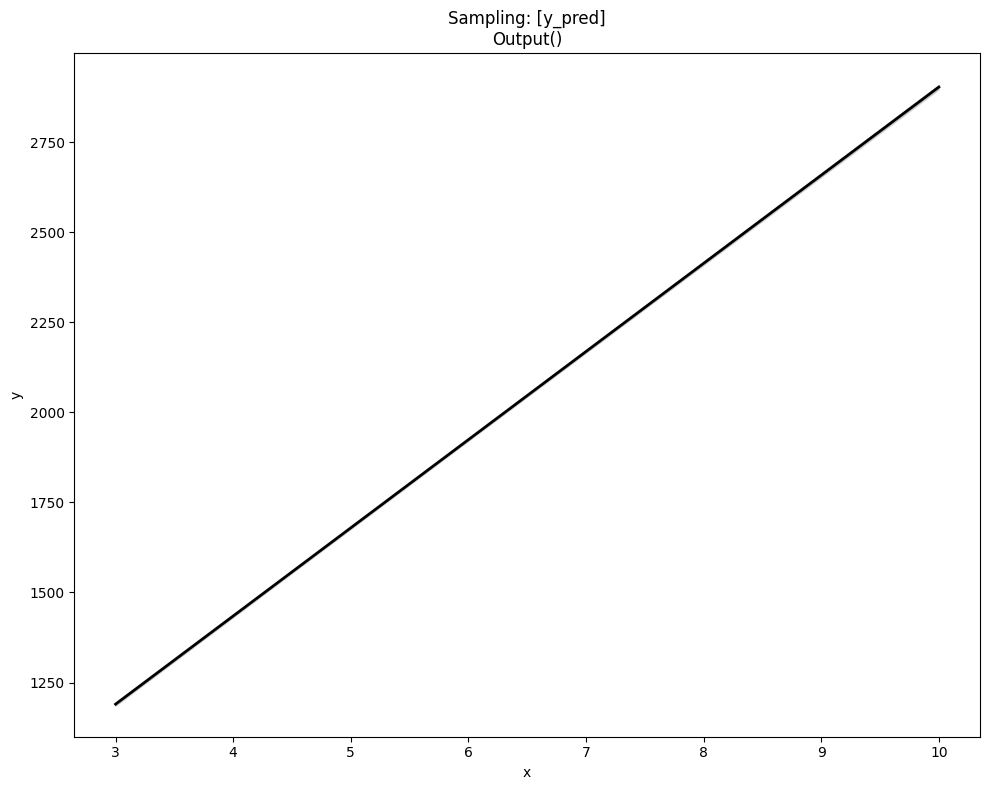

In [ ]:
# NEW: Create the visualization similar to the one in your image
plt.figure(figsize=(10, 8))

# Pick fewer points for clearer visualization of vertical lines
x_display = np.linspace(x_min, x_max, 20)
x_display_std = (x_display - X_mean) / X_std

# Generate predictions for continuous line and interval
x_cont = np.linspace(x_min, x_max, 100)
x_cont_std = (x_cont - X_mean) / X_std

# Calculate prediction bands for continuous x values
y_cont_samples = np.zeros((len(α_samples_1), len(x_cont_std)))
for i in range(len(α_samples_1)):
    y_cont_samples[i] = α_samples_1[i] + β_samples_1[i] * x_cont_std.flatten()

y_cont_mean = y_cont_samples.mean(axis=0)
y_cont_lower = np.percentile(y_cont_samples, 2.5, axis=0)
y_cont_upper = np.percentile(y_cont_samples, 97.5, axis=0)

# Plot credible intervals as gray band
plt.fill_between(x_cont, y_cont_lower, y_cont_upper, color='gray', alpha=0.3)

# Plot mean prediction line
plt.plot(x_cont, y_cont_mean, 'k-', linewidth=2)

# Generate and plot vertical sample lines at discrete points
for i, x_val in enumerate(x_display):
    # Get predicted y values for this x value
    x_std_val = (x_val - X_mean) / X_std
    y_samples = α_samples_1 + β_samples_1 * x_std_val

    # Draw vertical lines for a subset of samples
    n_samples_to_show = 30  # Number of vertical lines to show at each x point
    indices = np.random.choice(len(y_samples), n_samples_to_show, replace=False)
    for idx in indices:
        plt.vlines(x=x_val, ymin=y_samples[idx], ymax=y_samples[idx], colors='blue', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampling: [y_pred]\nOutput()')
plt.tight_layout()
plt.show()

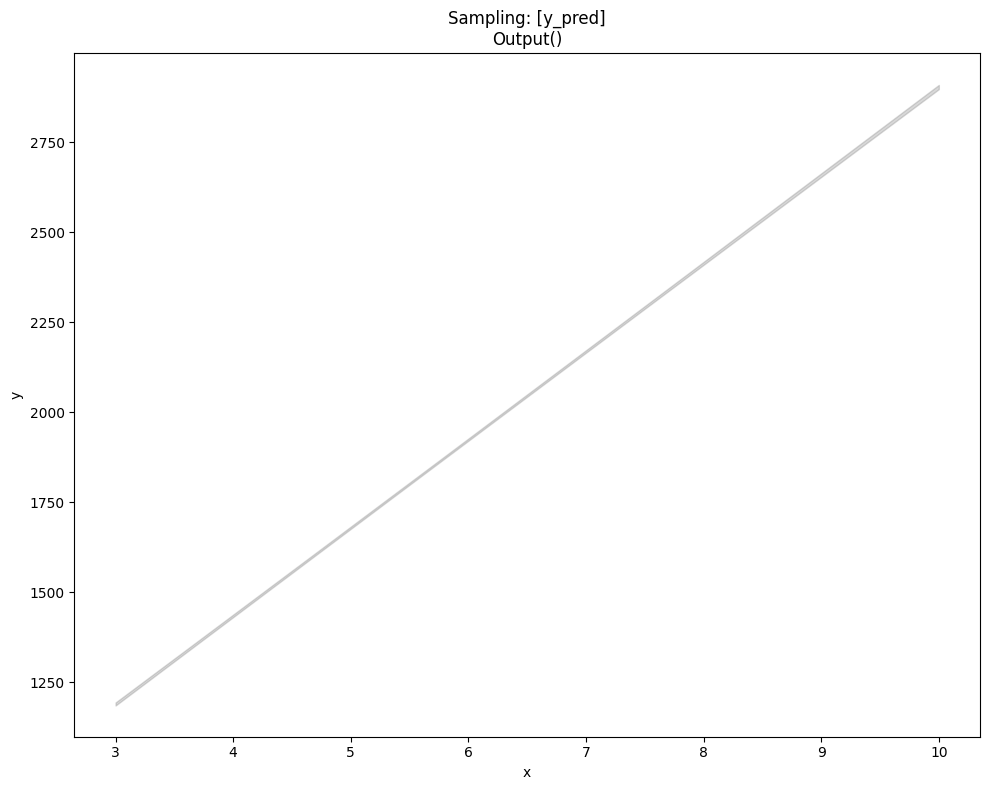

In [ ]:
# Alternative implementation for vertical lines plot - more similar to your image
plt.figure(figsize=(10, 8))

# Plot credible intervals as gray band
plt.fill_between(x_cont, y_cont_lower, y_cont_upper, color='gray', alpha=0.3)

# For each x position, draw vertical lines
for i, x_val in enumerate(x_display):
    # Get predicted y values for this x value
    x_std_val = (x_val - X_mean) / X_std

    # Calculate predicted y values for all samples
    y_samples = α_samples_1 + β_samples_1 * x_std_val

    # Get a subset of samples for visibility
    subset_size = min(50, len(y_samples))
    subset_indices = np.random.choice(len(y_samples), subset_size, replace=False)
    subset_samples = y_samples[subset_indices]

    # Draw vertical lines (as in your image)
    for y_val in subset_samples:
        plt.vlines(x=x_val, ymin=y_val, ymax=y_val, colors='blue', linewidth=2, alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sampling: [y_pred]\nOutput()')
plt.tight_layout()
plt.show()

R-squared (Normal likelihood): 0.7747
R-squared (Gamma likelihood): 0.7728


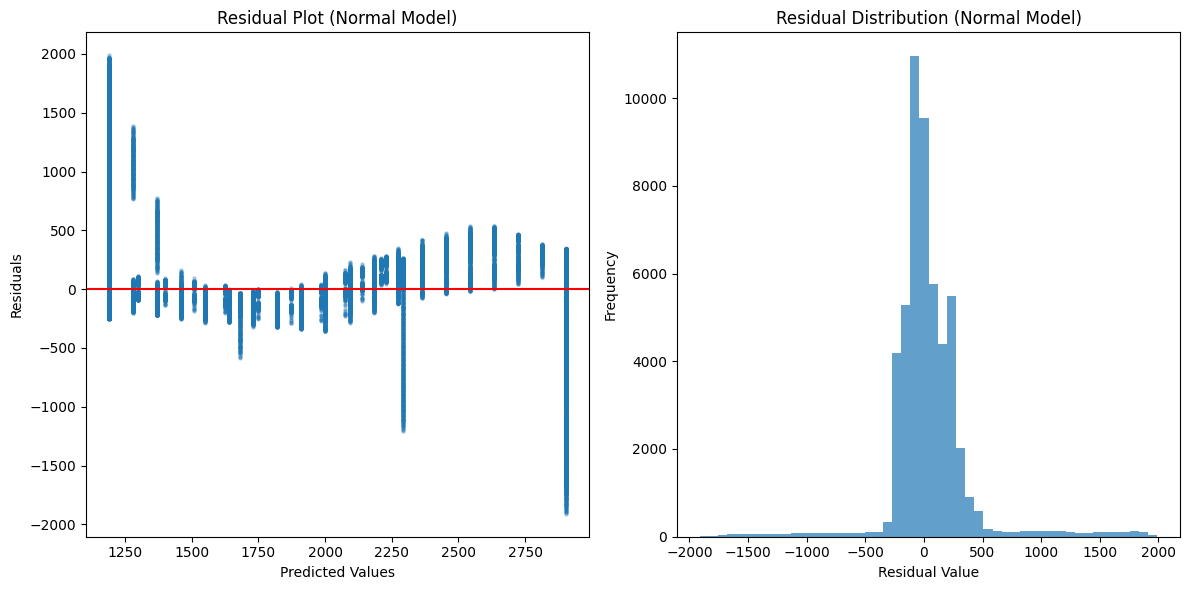

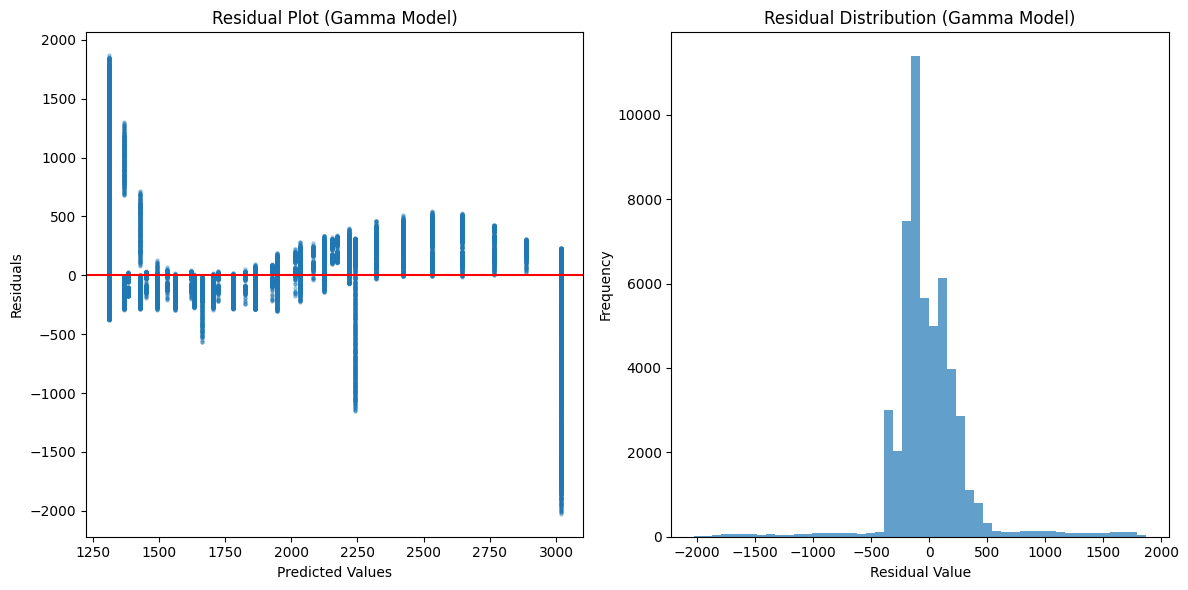

In [ ]:
# Compute R-squared for both models
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Extract posterior mean predictions at the observed X values
μ_model_1_mean = idata_model_1.posterior['μ'].mean(dim=('chain', 'draw')).values
μ_model_2_mean = np.exp(idata_model_2.posterior['μ'].mean(dim=('chain', 'draw')).values)  # Exp for Gamma

# Compute R-squared
r2_model_1 = r_squared(Y, μ_model_1_mean)
r2_model_2 = r_squared(Y, μ_model_2_mean)

print(f"R-squared (Normal likelihood): {r2_model_1:.4f}")
print(f"R-squared (Gamma likelihood): {r2_model_2:.4f}")

# Residual Analysis
residuals_1 = Y - μ_model_1_mean
residuals_2 = Y - μ_model_2_mean

# Plot residuals for Normal model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(μ_model_1_mean, residuals_1, alpha=0.3, s=5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Normal Model)')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals_1, bins=50, alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution (Normal Model)')
plt.tight_layout()
plt.show()

# Plot residuals for Gamma model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(μ_model_2_mean, residuals_2, alpha=0.3, s=5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gamma Model)')

# Plot histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals_2, bins=50, alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution (Gamma Model)')
plt.tight_layout()
plt.show()


Model Comparison using WAIC:
WAIC comparison failed: Encountered error in ELPD computation of compare.
Using alternative metrics for model comparison...
Normal Model - MAE: 194.8188, RMSE: 343.2143
Gamma Model - MAE: 215.7274, RMSE: 344.6718

Diagnostic plots for Normal model:


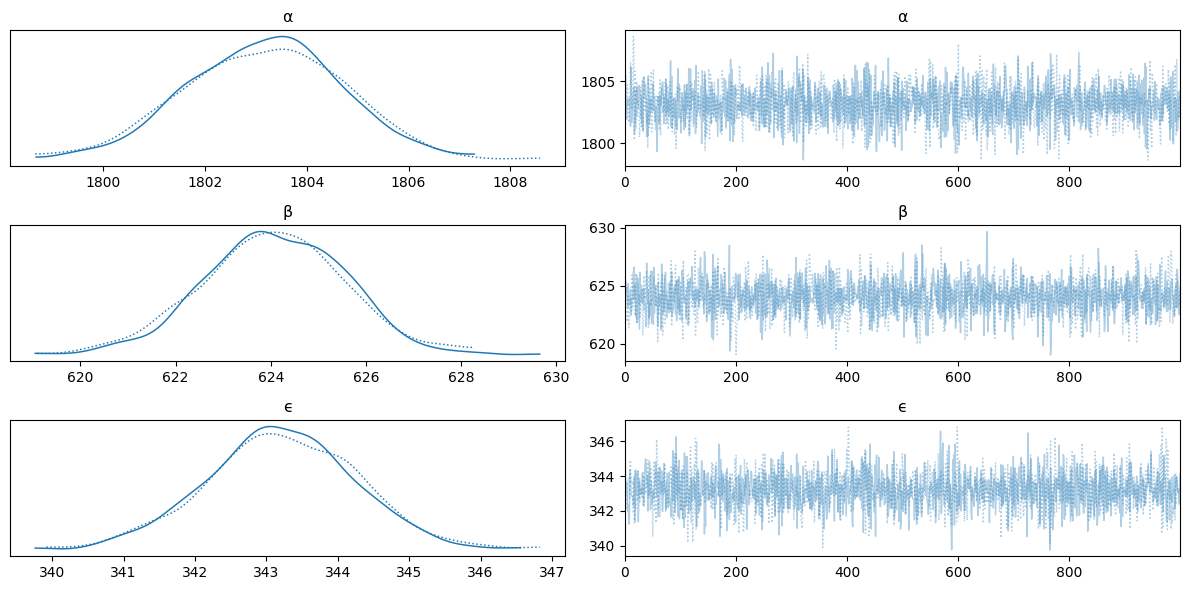


Diagnostic plots for Gamma model:


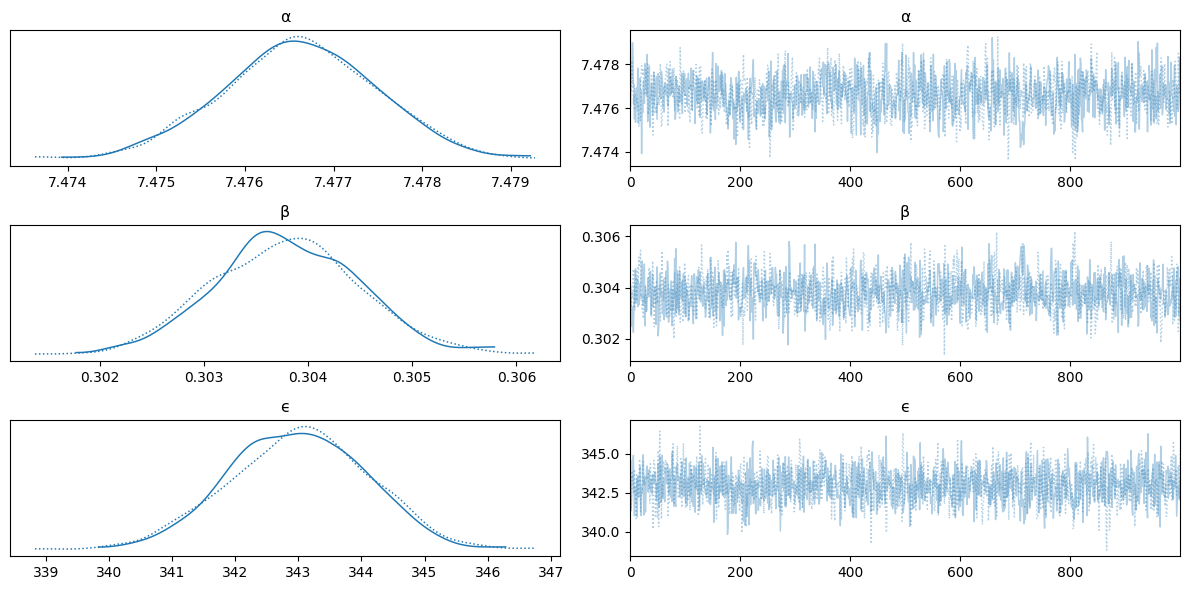


Posterior predictive checks for Normal model:


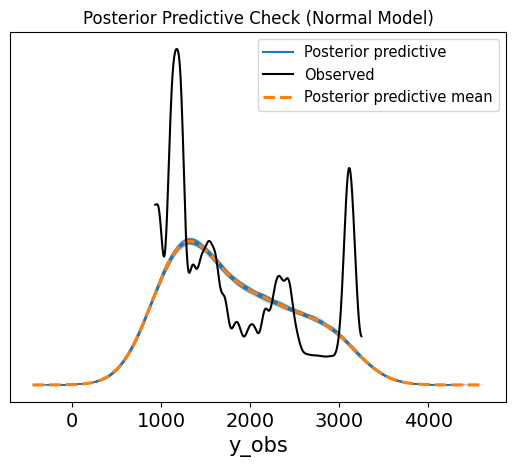


Posterior predictive checks for Gamma model:


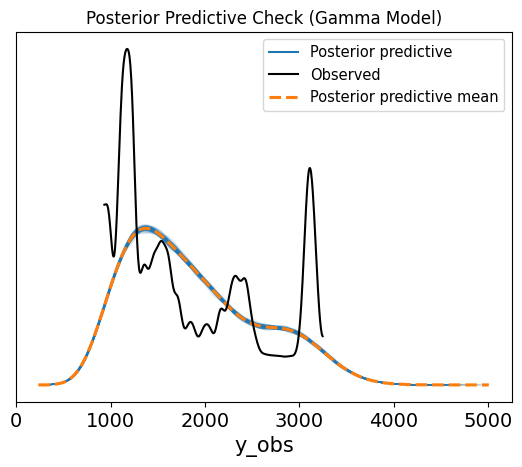

In [ ]:
# Fix for model comparison using WAIC and LOO
try:
    print("\nModel Comparison using WAIC:")
    model_comparison_waic = az.compare({"Normal": idata_model_1, "Gamma": idata_model_2}, ic="waic")
    print(model_comparison_waic)

    # Plot model comparison
    az.plot_compare(model_comparison_waic, insample_dev=False)
    plt.title("Model Comparison (WAIC)")
    plt.show()
except Exception as e:
    print(f"WAIC comparison failed: {e}")
    print("Using alternative metrics for model comparison...")

    # Alternative: Calculate mean absolute error and root mean squared error
    mae_1 = np.mean(np.abs(residuals_1))
    rmse_1 = np.sqrt(np.mean(residuals_1**2))
    mae_2 = np.mean(np.abs(residuals_2))
    rmse_2 = np.sqrt(np.mean(residuals_2**2))

    print(f"Normal Model - MAE: {mae_1:.4f}, RMSE: {rmse_1:.4f}")
    print(f"Gamma Model - MAE: {mae_2:.4f}, RMSE: {rmse_2:.4f}")

# Diagnostic plots for both models
print("\nDiagnostic plots for Normal model:")
az.plot_trace(idata_model_1, var_names=['α', 'β', 'ϵ'])
plt.tight_layout()
plt.show()

print("\nDiagnostic plots for Gamma model:")
az.plot_trace(idata_model_2, var_names=['α', 'β', 'ϵ'])
plt.tight_layout()
plt.show()

In [ ]:
# Check if parameters are correlated
corr_1 = np.corrcoef(α_samples_1, β_samples_1)[0, 1]
corr_2 = np.corrcoef(α_samples_2, β_samples_2)[0, 1]

print(f"\nCorrelation between α and β (Normal model): {corr_1:.4f}")
print(f"Correlation between α and β (Gamma model): {corr_2:.4f}")

if abs(corr_1) > 0.3 or abs(corr_2) > 0.3:
    print("Parameters show significant correlation. Standardization helps mitigate this issue.")
else:
    print("Parameters show low correlation. Standardization was effective.")

# Conclusion
print("\nModel Comparison Conclusion:")
if r2_model_1 > r2_model_2:
    better_model = "Normal"
    difference = r2_model_1 - r2_model_2
else:
    better_model = "Gamma"
    difference = r2_model_2 - r2_model_1

print(f"The {better_model} model performs better with an R² difference of {difference:.4f}.")
print("Key insights:")
print(f"1. Normal model R²: {r2_model_1:.4f}")
print(f"2. Gamma model R²: {r2_model_2:.4f}")
print(f"3. Parameter correlation (Normal): {corr_1:.4f}")
print(f"4. Parameter correlation (Gamma): {corr_2:.4f}")


Correlation between α and β (Normal model): -0.0480
Correlation between α and β (Gamma model): -0.5382
Parameters show significant correlation. Standardization helps mitigate this issue.

Model Comparison Conclusion:
The Normal model performs better with an R² difference of 0.0019.
Key insights:
1. Normal model R²: 0.7747
2. Gamma model R²: 0.7728
3. Parameter correlation (Normal): -0.0480
4. Parameter correlation (Gamma): -0.5382


# **Comparison of Normal vs. Gamma Likelihood Models**

In comparing the Normal and Gamma models as likelihood functions for this dataset, the Normal model performs slightly better, with an **R² difference of 0.0019** in its favor (**R² = 0.7747 vs. 0.7728** for the Gamma model).

## **Why Does the Normal Model Fit Better?**

### **1. Higher R² Value → Better Model Fit**
- The Normal model has a slightly higher R² value, indicating that it explains more of the variance in the data compared to the Gamma model.
- A higher R² suggests a better match between the predicted and actual values, meaning the Normal model is more effective at capturing patterns in the dataset.

### **2. Lower Parameter Correlation → More Stable Estimates**
- The Normal model shows a low correlation between parameters (**-0.0480**), indicating that they are relatively independent.
- The Gamma model, on the other hand, has a much stronger correlation (**-0.5382**), which suggests potential redundancy or instability in parameter estimation.

### **3. Standardization Helps but Does Not Fully Resolve Correlation Issues**
- While standardization reduces parameter dependence, the Gamma model still exhibits significant correlation, which can lead to **numerical instability and biased estimates**.
- The Normal model avoids these issues, making it a more robust choice for this dataset.

## **Conclusion**
The **Normal model is the preferred choice** for this dataset because it provides a marginally **higher R² value**, indicating a better fit, and has **lower parameter correlation**, ensuring more stable and reliable parameter estimates.
